# Classify Cluster Stars from Field Stars with SVM

## Select and Preview Data

In [39]:
import numpy as np

cluster_id = 3  # Pick a cluster, make sure the data file exists

data = np.load('data/{}.npy'.format(cluster_id), allow_pickle=True)
print("#stars: {}".format(data.shape[0]))

#stars: 4551


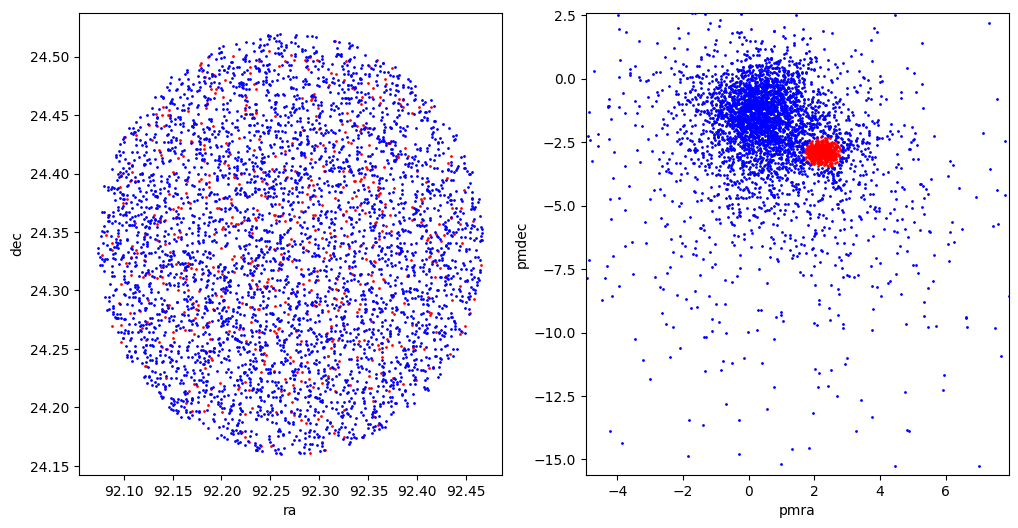

In [40]:
import matplotlib.pyplot as plt

def plot_cluster(_data):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    cluster_stars = np.array([star for star in _data if star[-1] == 1])
    field_stars = np.array([star for star in _data if star[-1] == 0])
    
    rf = 1 # reject factor for the pm chart
    pmra_min = np.percentile(_data[:, 2], rf)
    pmra_max = np.percentile(_data[:, 2], 100 - rf)
    pmdec_min = np.percentile(_data[:, 3], rf)
    pmdec_max = np.percentile(_data[:, 3], 100 - rf)
    
    # print(pmra_min, pmra_max, pmdec_min, pmdec_max)
    ax[0].scatter(cluster_stars[:, 0], cluster_stars[:, 1], s=1, color='red')
    ax[0].scatter(field_stars[:, 0], field_stars[:, 1], s=1, color='blue')
    ax[0].set_xlabel("ra")
    ax[0].set_ylabel("dec")
    
    ax[1].scatter(cluster_stars[:, 2], cluster_stars[:, 3], s=1, color='red')
    ax[1].scatter(field_stars[:, 2], field_stars[:, 3], s=1, color='blue')
    ax[1].set_xlabel("pmra")
    ax[1].set_ylabel("pmdec")
    ax[1].set(xlim=(pmra_min, pmra_max), ylim=(pmdec_min, pmdec_max))
    
    plt.show()
    
plot_cluster(data)

# segmentation problem, dont reinvent the wheel